In [2]:
#importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For missing value imputation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
import pandas as pd

# Define the file path
file_path = "../Data_Set/new_df_without_outliers_copy_smote_resampled_noNormalised.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(df.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   smoking_history_encoded  gender_encoded  diabetes  
0                 0.131757       -0.128959         0  
1                -0.797024       -0.128959         0  
2                 0.131757        0.160772         0  
3                 0.165669       -0.128959         0  
4                 0.165669        0.160772         0  


In [7]:
#Separate features (X) and target variable (y)
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create the random forest model (adjust hyperparameters if needed)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [11]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [12]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9809268817797897
Precision: 0.9860436554457657
Recall: 0.9756407423773752
F1-score: 0.980814615320543


[Text(0.5357142857142857, 0.9166666666666666, 'blood_glucose_level <= 113.0\ngini = 0.5\nsamples = 91464\nvalue = [72430, 72485]\nclass = Diabetes'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 13958\nvalue = [21988, 0]\nclass = No Diabetes'),
 Text(0.6071428571428571, 0.75, 'HbA1c_level <= 5.7\ngini = 0.484\nsamples = 77506\nvalue = [50442, 72485]\nclass = Diabetes'),
 Text(0.35714285714285715, 0.5833333333333334, 'bmi <= 27.344\ngini = 0.102\nsamples = 16698\nvalue = [25071, 1428]\nclass = No Diabetes'),
 Text(0.21428571428571427, 0.4166666666666667, 'blood_glucose_level <= 210.0\ngini = 0.062\nsamples = 11388\nvalue = [17551.0, 577.0]\nclass = No Diabetes'),
 Text(0.14285714285714285, 0.25, 'hypertension <= 0.5\ngini = 0.05\nsamples = 11319\nvalue = [17551, 460]\nclass = No Diabetes'),
 Text(0.07142857142857142, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 69

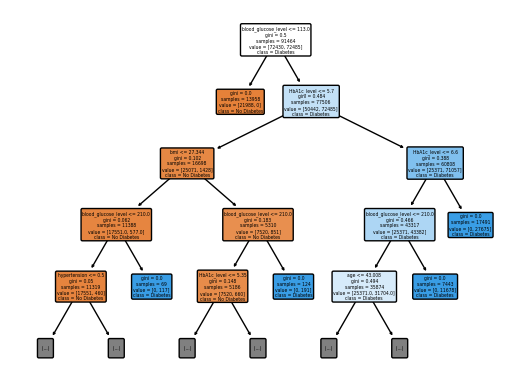

In [13]:
from sklearn.tree import plot_tree

# Choose a tree from the forest (e.g., the first tree)
tree = model.estimators_[0]

# Plot the tree
plot_tree(tree, filled=True, rounded=True, max_depth=4, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Get feature importance scores
importances = model.feature_importances_

In [15]:
importances

array([0.17505584, 0.0030026 , 0.00191444, 0.07823645, 0.3352552 ,
       0.19626429, 0.11110986, 0.09916131])

In [16]:
# Assuming your dataframe is called 'df'
feature_names = X.columns.tolist()  # Extract feature names as a list

feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'smoking_history_encoded',
 'gender_encoded']

Features with most importance: HbA1c Level

In [17]:
# Assuming your dataframe is called 'df'
feature_names = X.columns.tolist()  # Extract feature names as a list

feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'smoking_history_encoded',
 'gender_encoded']

In [18]:
# Sort features and importance scores together by importance (descending)
sorted_idx = importances.argsort()[::-1]
features_sorted = ["Feature " + str(i + 1) for i in sorted_idx]
importances_sorted = importances[sorted_idx]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importances_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

NameError: name 'plt' is not defined